In [1]:
import numpy as np
from numpy import *
import sympy as sp

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sympy.vector import *
from IPython.display import Math
sp.init_printing(use_unicode=True)

# Define Initial Cartesian Grid

In [2]:
pts = 500
grid = np.linspace(-2,2,pts)
xg, yg = np.meshgrid(grid, grid)
zg = 0 # initially choose to viev the XY plane, can adjust later

In [3]:
# define sympy symbols to work with

x, y, z, r, theta, phi = sp.symbols('x, y, z, r, theta, phi')

# Take Transformation input

In [4]:
#x_str = input('Please, input transformed x-coordinat: ')
#y_str = input('Please, input transformed y-coordinats: ')
#z_str = input('Please, input transformed z-coordinate: ')

x_str='x'
y_str='y*(1-exp(-(x/(1000))**2-(y/(1000))**2))'
z_str='z'

x_str_sympy = sp.parsing.sympy_parser.parse_expr(x_str)
y_str_sympy = sp.parsing.sympy_parser.parse_expr(y_str)
z_str_sympy = sp.parsing.sympy_parser.parse_expr(z_str)

In [5]:
transformed_list = sp.Matrix([[x_str_sympy],[y_str_sympy],[z_str_sympy]])
smb_lst = list(transformed_list.atoms(sp.Symbol))
p_smb_lst = sp.Matrix([[sp.symbols('x\'')],[sp.symbols('y\'')],[sp.symbols('z\'')]])
display(Math(sp.latex(p_smb_lst) + ' = ' + sp.latex(transformed_list)))

<IPython.core.display.Math object>

In [6]:
smb_lst = [str(elem) for elem in smb_lst]
smb_lst.sort()
smb_lst = sp.sympify(smb_lst)
smb_lst

# Define Jacobian (transformation) matrix

In [7]:
J = sp.Matrix([[transformed_list[0].diff(smb_lst[0]), transformed_list[0].diff(smb_lst[1]), transformed_list[0].diff(smb_lst[2])],
               [transformed_list[1].diff(smb_lst[0]), transformed_list[1].diff(smb_lst[1]), transformed_list[1].diff(smb_lst[2])],
               [transformed_list[2].diff(smb_lst[0]), transformed_list[2].diff(smb_lst[1]), transformed_list[2].diff(smb_lst[2])]])

J = sp.simplify(J)

jj = sp.simplify(transformed_list.jacobian(smb_lst))


display(Math(sp.latex(J)))
display(Math(sp.latex(jj)))

# Works either way

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
Epsilon = sp.eye(3,3)

$\epsilon^{ij} = \frac{\Lambda \epsilon \Lambda^T}{det(\Lambda)}$

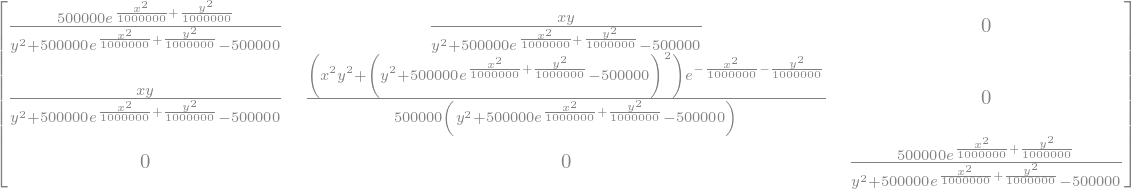

In [9]:
Epsilon_prime = sp.simplify((J*Epsilon*sp.transpose(J))/sp.det(J))
Epsilon_prime

In [10]:
Eps_upper_ij_num = Epsilon_prime.subs(x, sp.symbols('(xg)'))
Eps_upper_ij_num = Eps_upper_ij_num.subs(y, sp.symbols('(yg)'))
Eps_upper_ij_num = Eps_upper_ij_num.subs(z, sp.symbols('(zg)'))


E_comps = []

for i in range(3):
    for j in range(3):
            elem = eval(str(Eps_upper_ij_num[i,j]))
            if type(elem)==int:
                  elem = np.zeros((pts,pts))

            E_comps.append(elem)

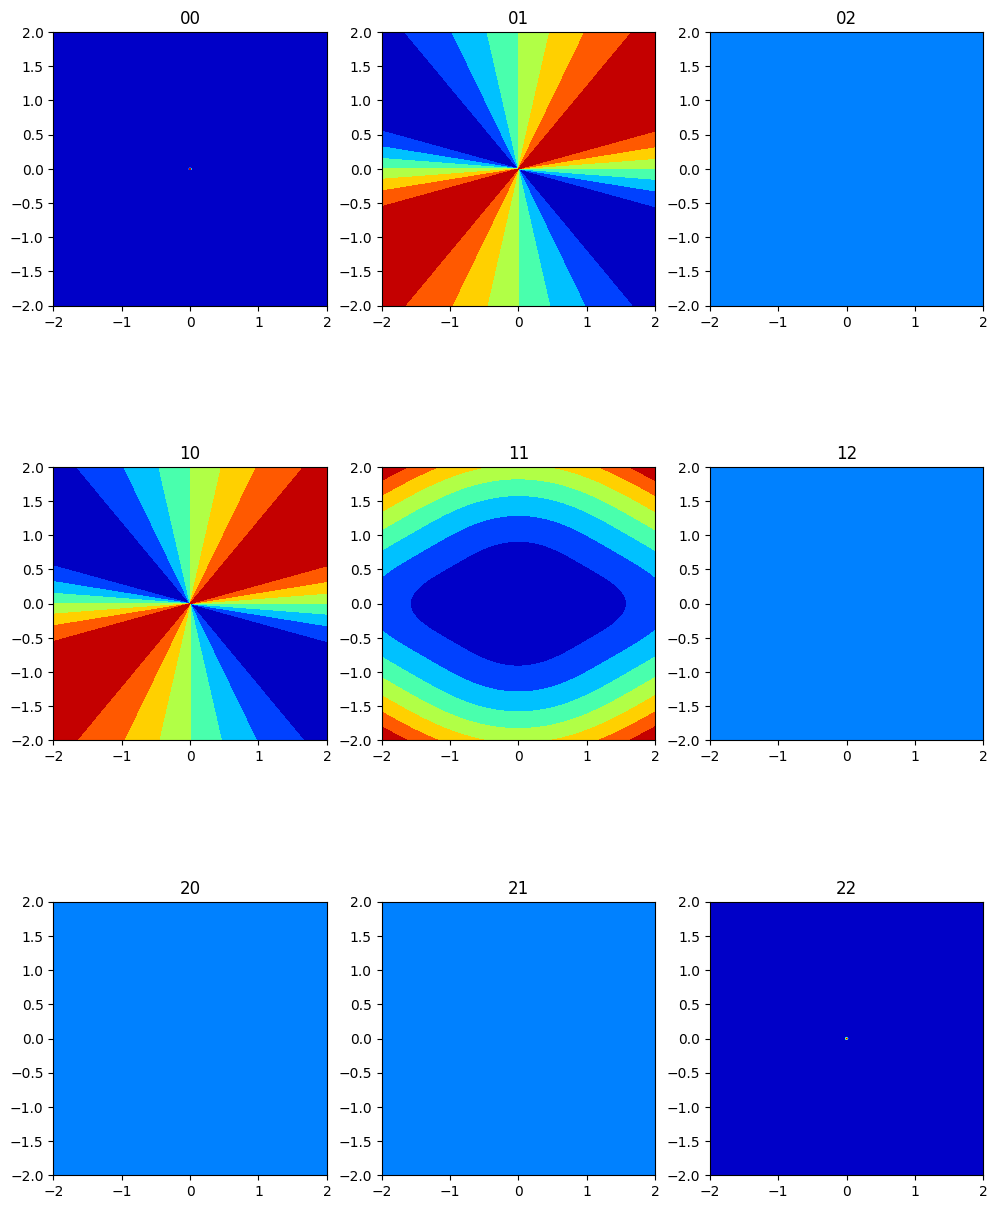

In [11]:
fig = plt.figure(figsize = (12,16))

titles = ['00','01','02','10','11','12','20','21','22']

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.contourf(grid,grid,E_comps[i], cmap='jet')
    ax.set_aspect('equal')
    ax.set_title(titles[i])

# Define metrics for diffferent possible initial coordinate systems

In [12]:
g_cart = sp.eye(3)
g_cyl = sp.Matrix([[1,0,0],[0,r**2,0],[0,0,1]])
g_sph = sp.Matrix([[1,0,0],[0,r**2,0],[0,0,r**2*sp.sin(theta)**2]])

display(Math(r'Cartesian: [g_{ij}] = ' + sp.latex(g_cart)))
display(Math(r'Cylindrical: [g_{ij}] = ' + sp.latex(g_cyl)))
display(Math(r'Spherical: [g_{ij}] = ' + sp.latex(g_sph)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We use these metrics to convert from initial space to transformed space via:

$[g_{i'j'}] = \Lambda^T [g_{ij}] \Lambda$

$[g^{i'j'}] = [g_{i'j'}]^{-1}$

# Use the transformation matrix to find the metric

In [13]:
gij = sp.transpose(J) * g_cart * J
g_ij = sp.Inverse(gij)
det_g = sp.det(gij)


Permittivity tensor is related to the spatial metric:

$\mu^{ij} = \epsilon^{ij} = \sqrt{g} g^{ij}$

In [14]:
Eps_upper_ij = sp.sqrt(det_g)*gij
display(Math(r'\epsilon^{ij} = ' + sp.latex(Eps_upper_ij)))

<IPython.core.display.Math object>

In [15]:
Eps_upper_ij_num = Eps_upper_ij.subs(x, sp.symbols('(xg)'))
Eps_upper_ij_num = Eps_upper_ij_num.subs(y, sp.symbols('(yg)'))
Eps_upper_ij_num = Eps_upper_ij_num.subs(z, sp.symbols('(zg)'))

E_comps = []

for i in range(3):
    for j in range(3):
            elem = eval(str(Eps_upper_ij_num[i,j]))
            if type(elem)==int:
                  elem = np.zeros((pts,pts))

            E_comps.append(elem)



<string>:1: RuntimeWarning: invalid value encountered in sqrt


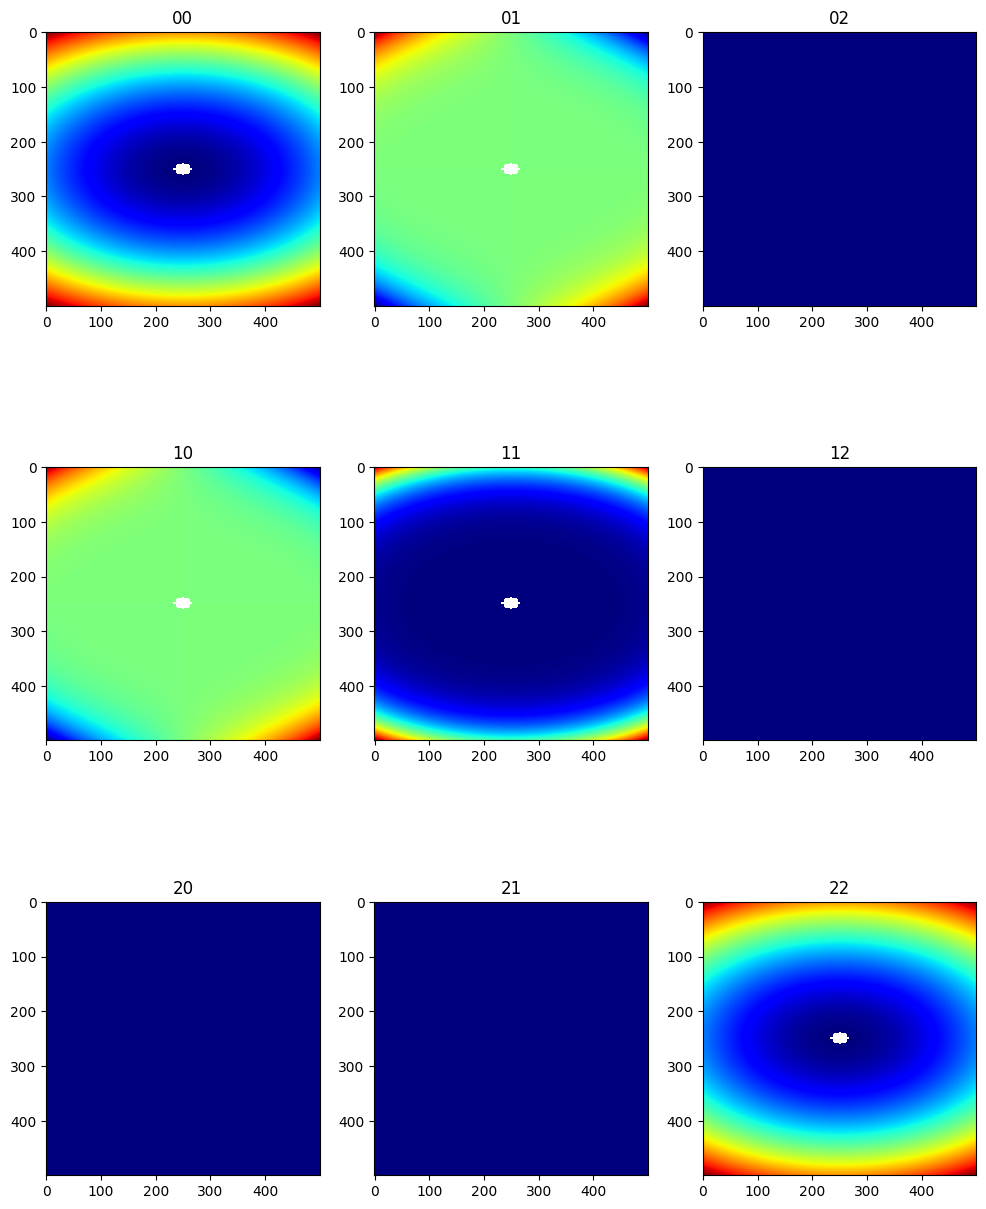

In [16]:
fig = plt.figure(figsize = (12,16))

titles = ['00','01','02','10','11','12','20','21','22']

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(E_comps[i], cmap='jet')
    ax.set_aspect('equal')
    ax.set_title(titles[i])